In [35]:
import pandas as pd

In [36]:
df = pd.read_csv("/content/drive/MyDrive/Intern task/train_and_test2.csv")
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [37]:
df.shape

(1309, 28)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [39]:
df.isnull().sum()

,0
Passengerid,0
Age,0
Fare,0
Sex,0
sibsp,0
zero,0
zero.1,0
zero.2,0
zero.3,0
zero.4,0


In [40]:
print(df.columns.tolist())

['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived']


In [41]:
df = df.loc[:, ~df.columns.str.contains('zero', case=False)]

In [42]:
# Rename incorrect survival column
df.rename(columns={'2urvived': 'Survived'}, inplace=True)

In [43]:
# Standardize column names (make consistent)
df.columns = df.columns.str.strip().str.capitalize()

In [44]:
# Display cleaned columns
print("Cleaned Columns:\n", df.columns.tolist())

Cleaned Columns:
 ['Passengerid', 'Age', 'Fare', 'Sex', 'Sibsp', 'Parch', 'Pclass', 'Embarked', 'Survived']


In [45]:
df.head()

,Passengerid,Age,Fare,Sex,Sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

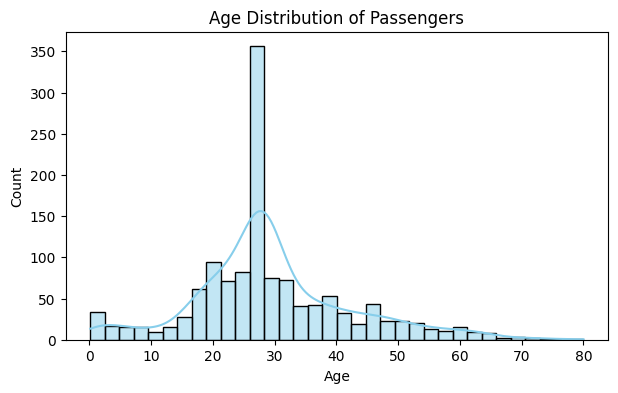

In [47]:
#  Age Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

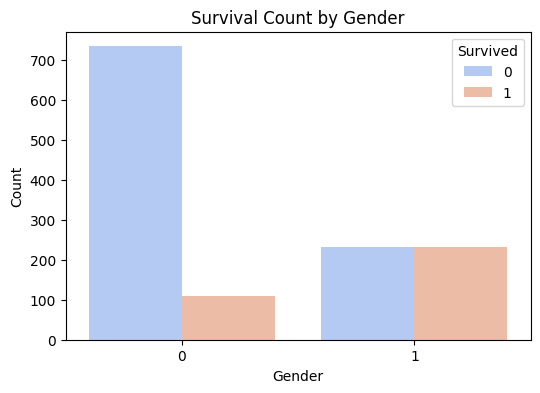

In [48]:

# Gender vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

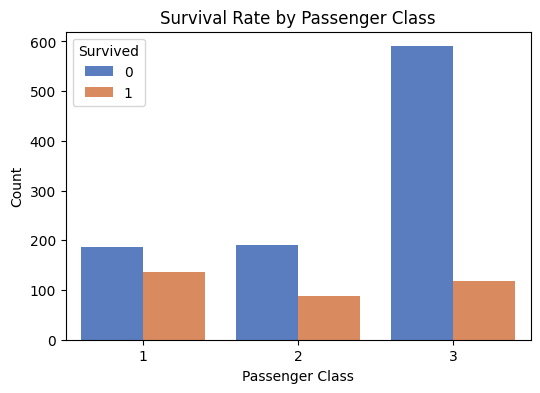

In [49]:
# Passenger Class vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='muted')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

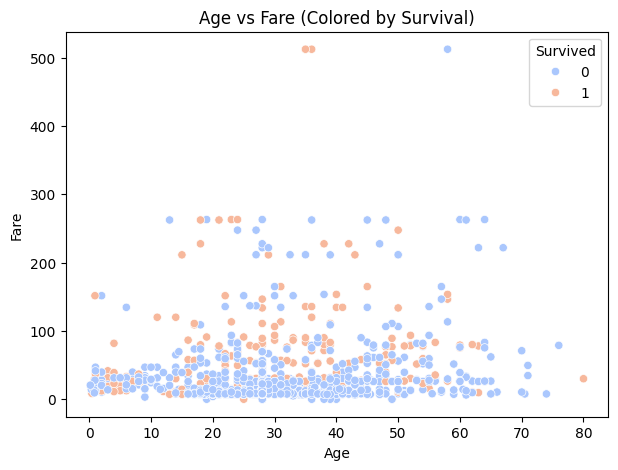

In [50]:
# Age vs Fare (Scatterplot)
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm')
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

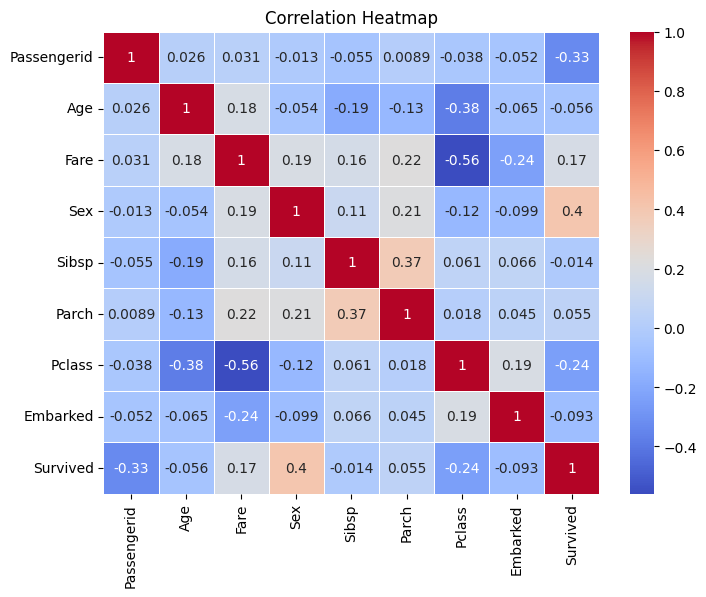

In [51]:
#  Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

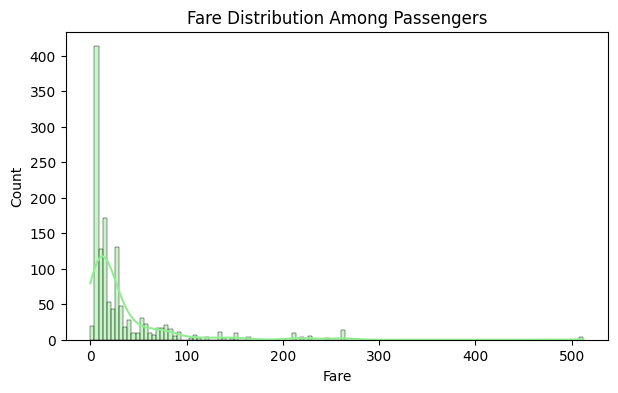

In [52]:
#  Fare Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['Fare'], kde=True, color='lightgreen')
plt.title("Fare Distribution Among Passengers")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()